In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
import geatpy as ea
import torch
plt.rcParams.update({'font.size': 15})

In [3]:
import os
from PIL import Image
import numpy as np

# 假设你的文件夹路径为folder_path
folder_path = '/data/mjy/Gait_recognition/data/001-1-000'

def convert_image_to_array(path):
    folder_path = path
    # 获取所有以"skeleton"结尾的文件夹的名称
    folder_names = sorted([f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f)) and f.endswith('skeleton')])

    # 初始化一个空的列表来存储所有文件夹的图像数组
    all_folders_images = []

    # 遍历每个文件夹
    for folder_name in folder_names:
        # 获取当前文件夹的路径
        current_folder_path = os.path.join(folder_path, folder_name)
        
        # 获取当前文件夹中的所有图像文件的名称
        image_names = sorted([f for f in os.listdir(current_folder_path) if f.endswith('.png') or f.endswith('.jpg')])
        
        # 初始化一个空的列表来存储当前文件夹的图像数组
        current_folder_images = []
        
        # 遍历每个图像文件
        for image_name in image_names:
            # 获取当前图像文件的路径
            image_path = os.path.join(current_folder_path, image_name)
            
            # 打开并读取图像
            image = Image.open(image_path).convert('L')
            
            # 将图像转换为数组并添加到列表中
            current_folder_images.append(np.array(image))
        
        # 将当前文件夹的图像数组添加到大的列表中
        all_folders_images.append(current_folder_images)

    # 将列表转换为数组
    all_folders_images_np = np.array(all_folders_images)

    return all_folders_images_np

In [4]:
import os

# 你的文件夹路径
folder_path = '/data/mjy/Gait_recognition/data'

# 使用os.listdir获取文件夹中的所有文件和文件夹的名称，并使用sorted进行排序
names = sorted(os.listdir(folder_path))

# 遍历所有的名称
for name in names:
    # 获取完整路径
    full_path = os.path.join(folder_path, name)
    
    # 使用os.path.isdir判断是否为文件夹
    if os.path.isdir(full_path):
        print(full_path)

/data/mjy/Gait_recognition/data/001-1-000
/data/mjy/Gait_recognition/data/002-2-000
/data/mjy/Gait_recognition/data/003-1-000
/data/mjy/Gait_recognition/data/007-1-000
/data/mjy/Gait_recognition/data/008-2-000
/data/mjy/Gait_recognition/data/009-1-000
/data/mjy/Gait_recognition/data/010-2-000
/data/mjy/Gait_recognition/data/011-1-000
/data/mjy/Gait_recognition/data/012-2-000
/data/mjy/Gait_recognition/data/013-1-000
/data/mjy/Gait_recognition/data/014-2-000
/data/mjy/Gait_recognition/data/015-1-000
/data/mjy/Gait_recognition/data/016-2-000
/data/mjy/Gait_recognition/data/017-1-000


In [5]:
all_converted_gait_recognition_data = np.empty((14, 50, 50, 480, 640))
path = '/data/mjy/Gait_recognition/data'
# 使用os.listdir获取文件夹中的所有文件和文件夹的名称，并使用sorted进行排序
names = sorted(os.listdir(folder_path))
i = 0
# 遍历所有的名称
for name in names:
    # 获取完整路径
    full_path = os.path.join(folder_path, name)
    if os.path.isdir(full_path):
        converted_data = convert_image_to_array(full_path)
        # print(converted_data.shape)  # 打印出转换后的数据的形状
        all_converted_gait_recognition_data[i] = converted_data
        i = i + 1
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [1]:
plt.imshow(all_converted_gait_recognition_data[-1, -1, -1], cmap='gray')

NameError: name 'plt' is not defined

In [62]:
with open('/data/mjy/Gait_recognition/converted_gait_data.pkl', 'wb') as f:
    # 使用pickle.dump将数据写入文件
    pickle.dump(all_converted_gait_recognition_data, f)

In [2]:
# 打开一个文件，准备读取
with open('/data/mjy/Gait_recognition/converted_gait_data.pkl', 'rb') as f:
    # 使用pickle.load从文件中读取数据
    data = pickle.load(f)

In [4]:
data.shape

(14, 50, 50, 480, 640)

/tmp/ipykernel_1489283/3858218876.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 4))


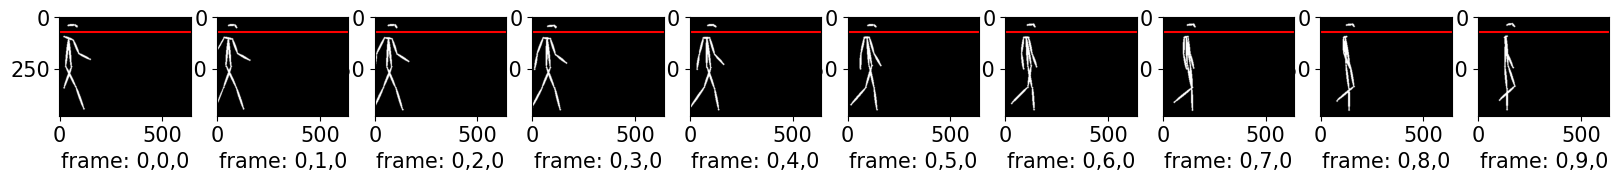

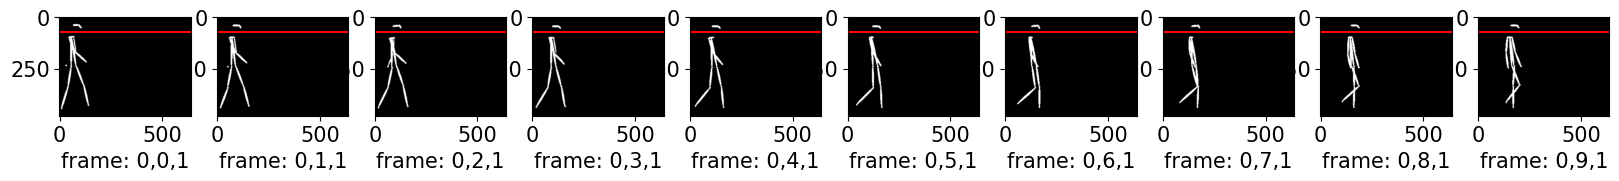

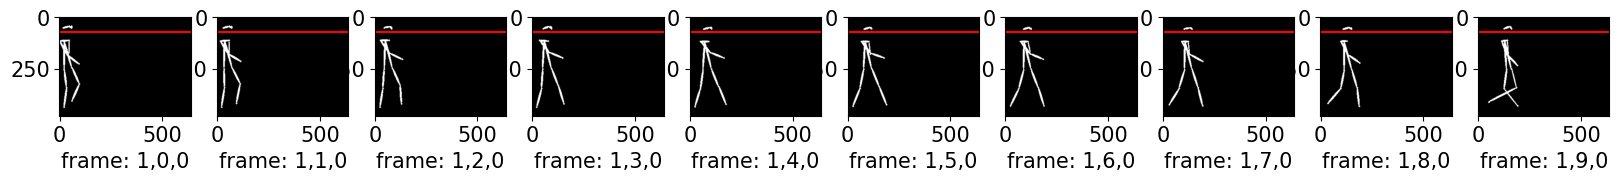

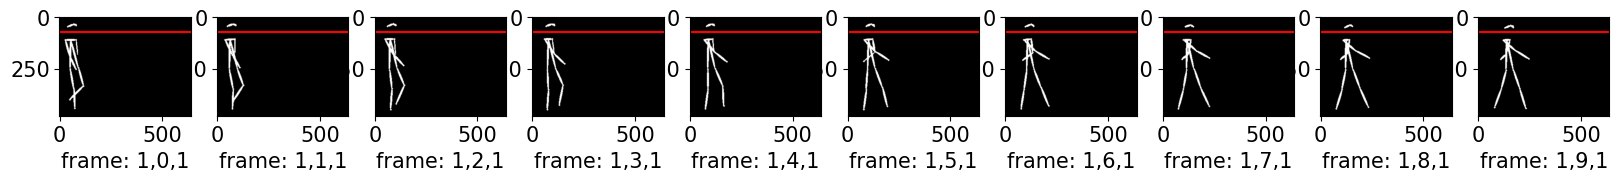

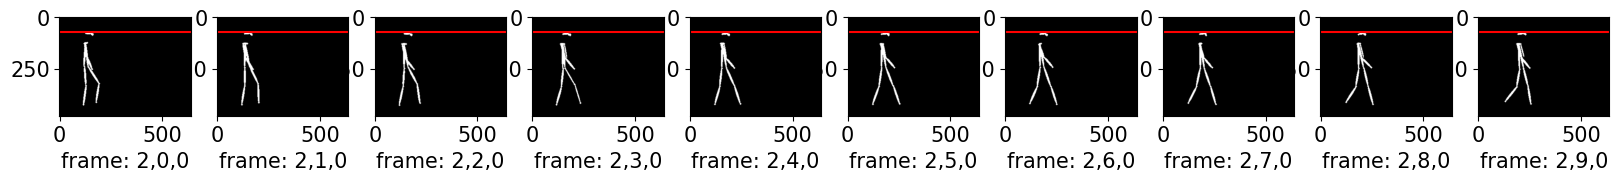

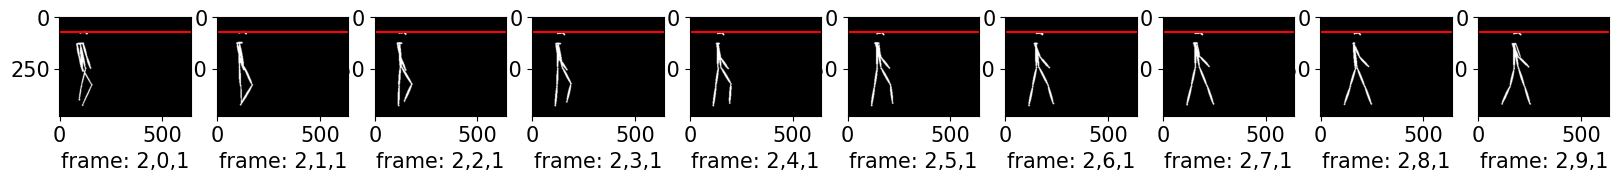

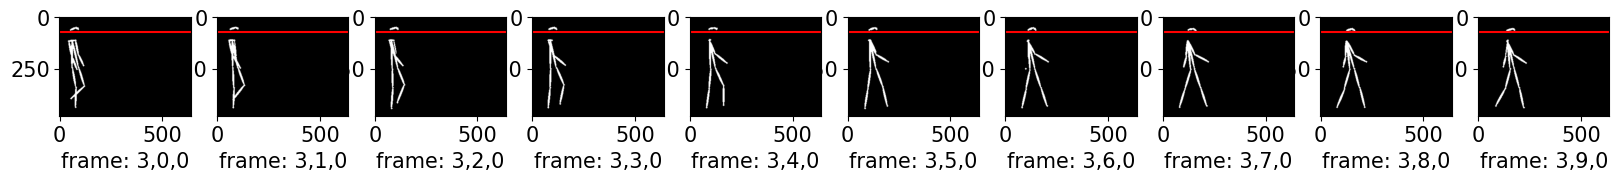

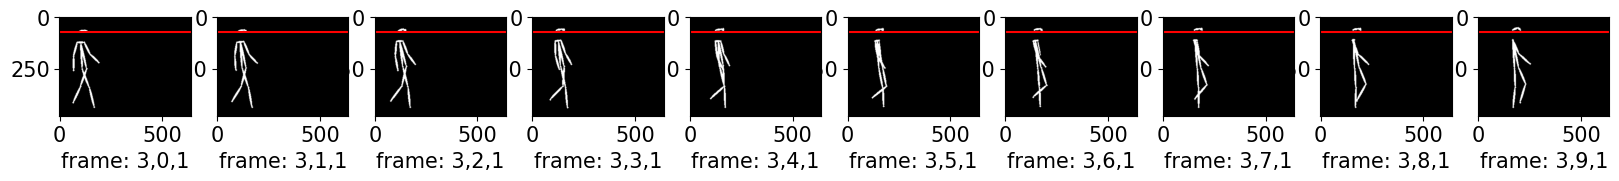

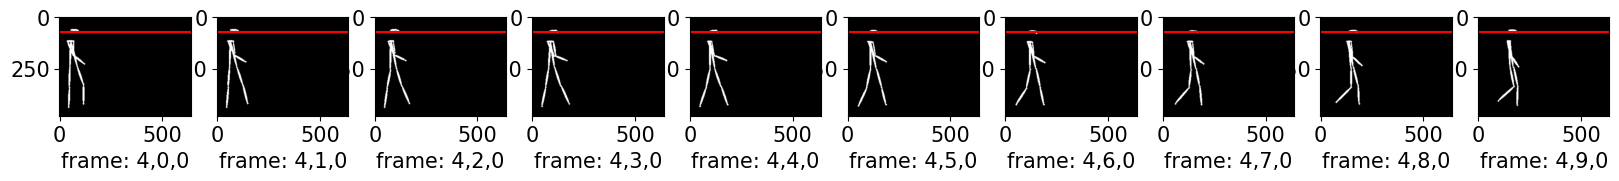

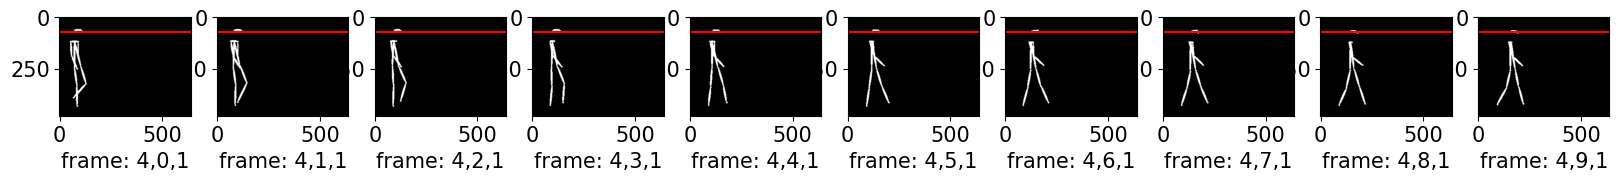

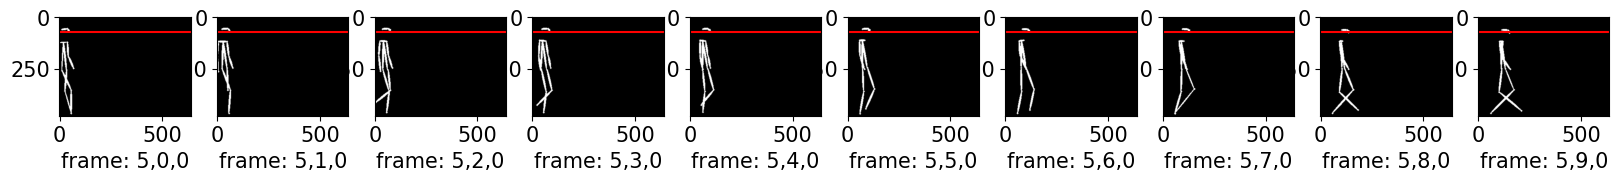

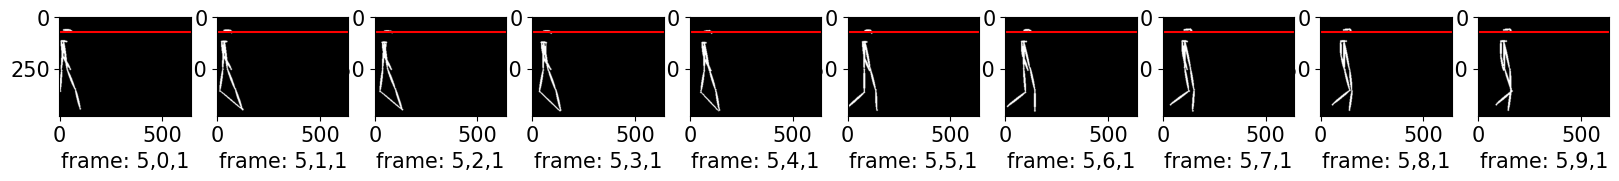

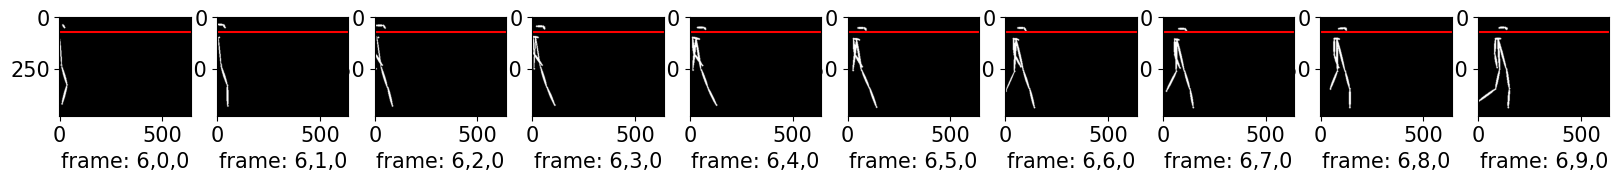

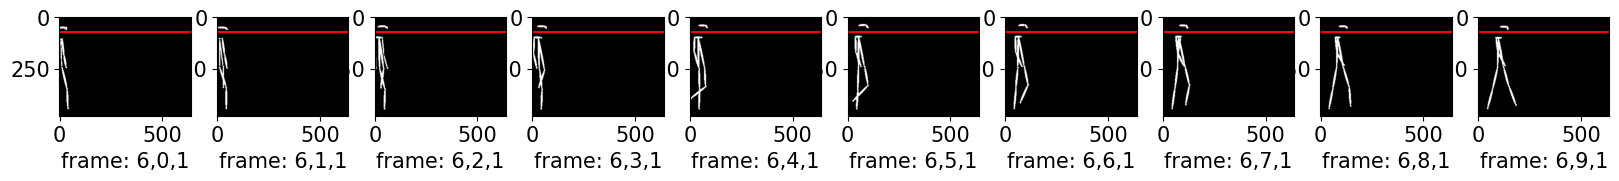

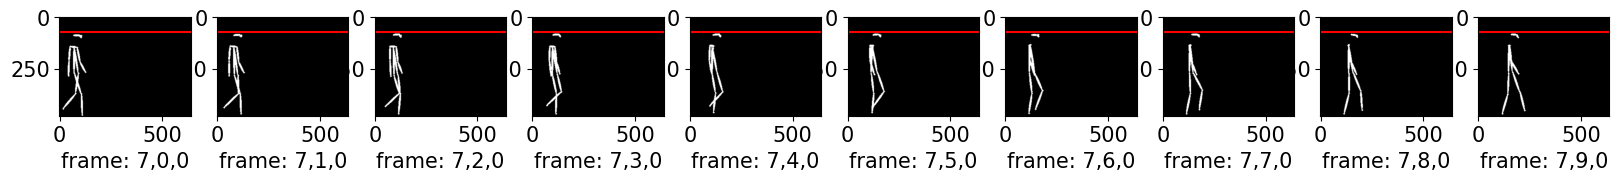

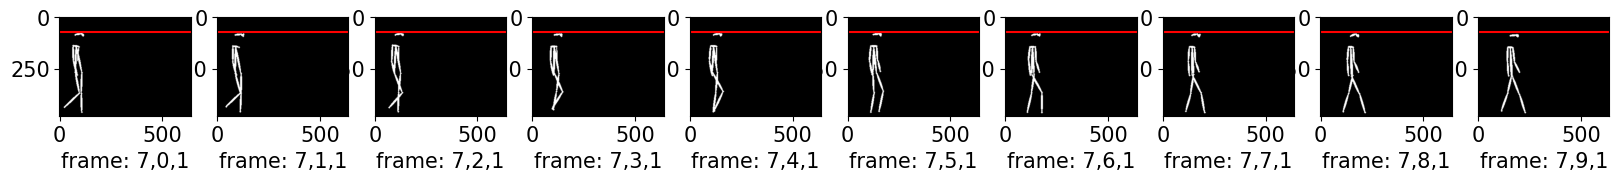

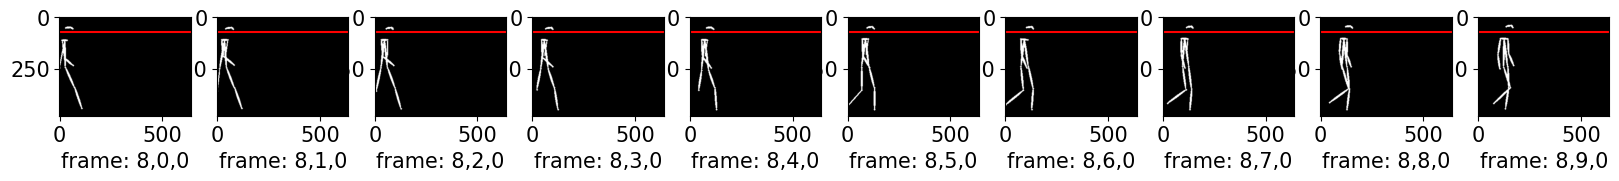

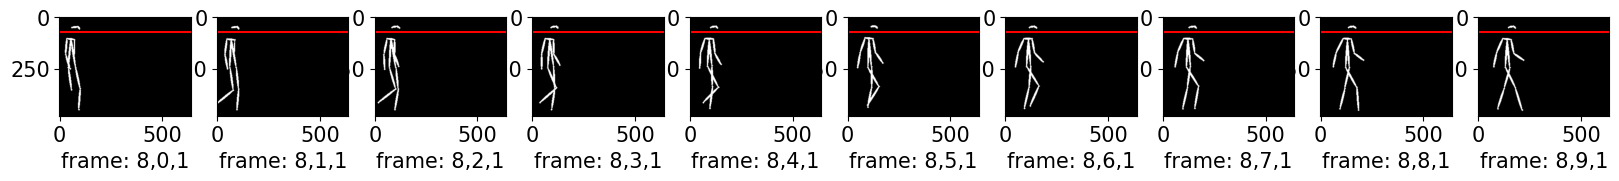

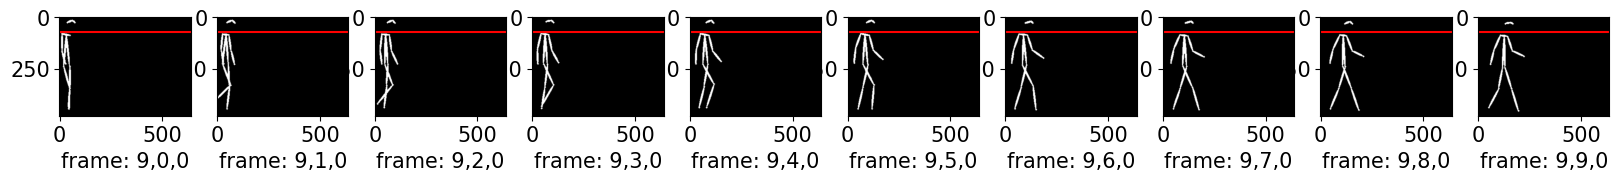

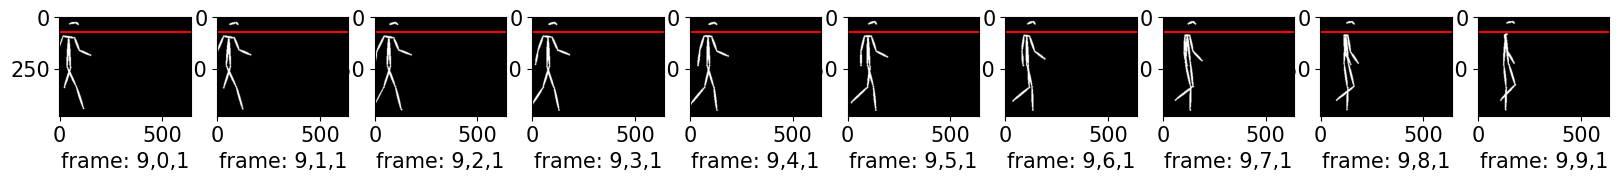

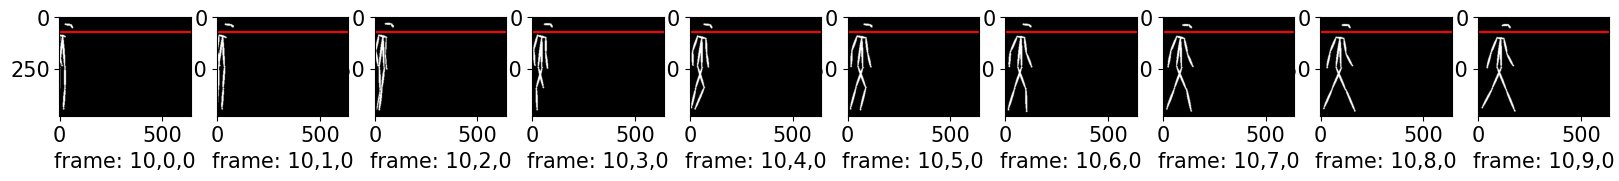

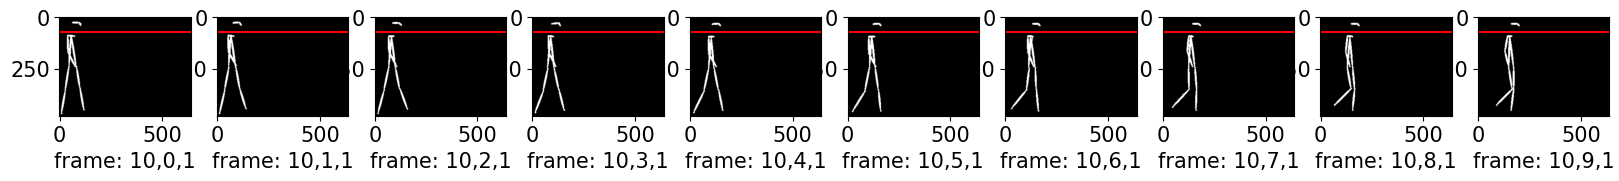

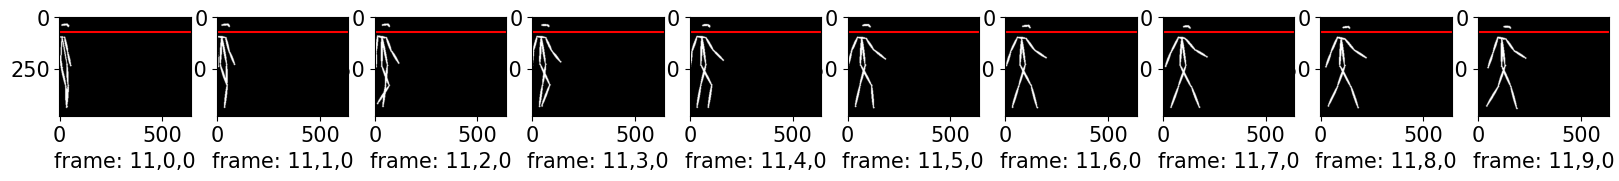

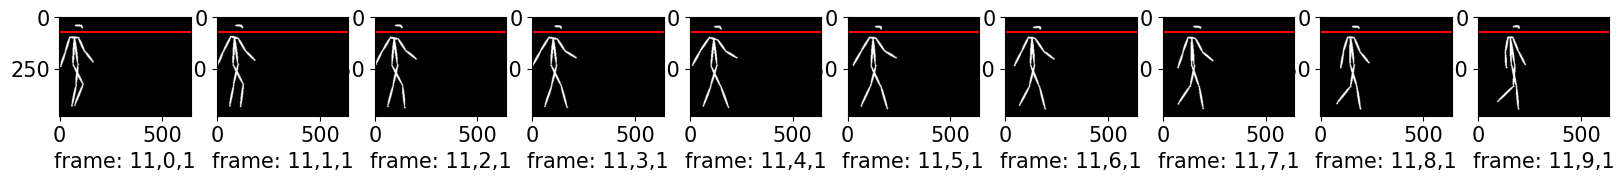

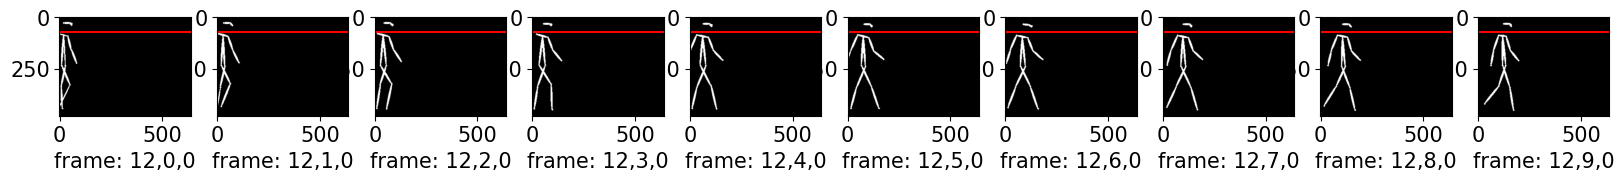

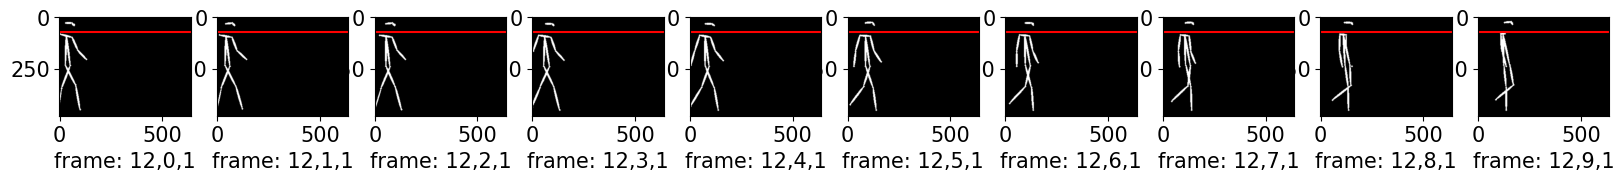

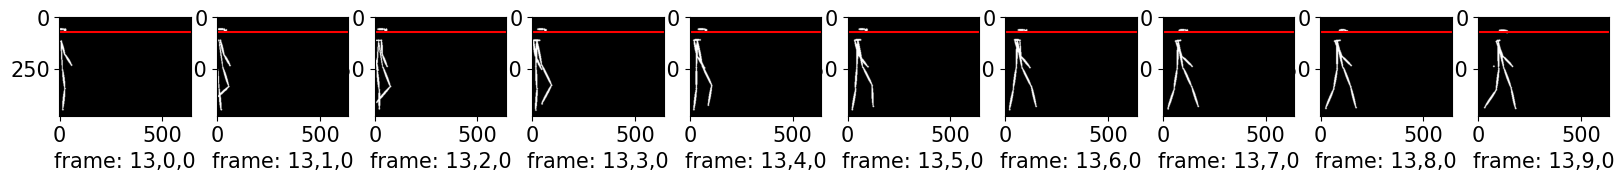

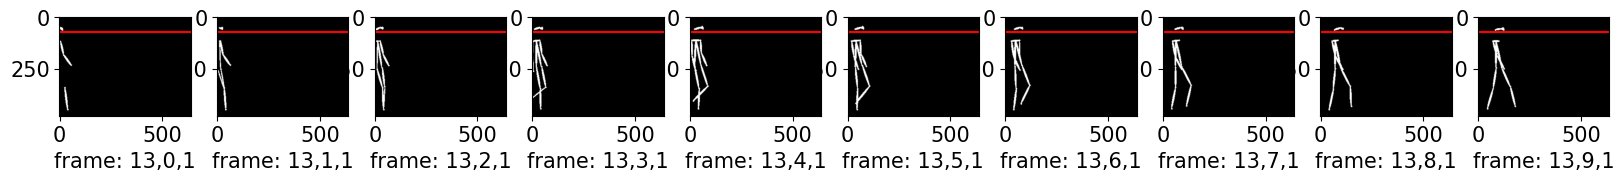

In [6]:
for j in range(14):
    plt.figure(figsize=(20, 4))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(data[j, 0, i], cmap='gray')
        plt.axhline(y=70, color='r', linestyle='-')
        plt.xlabel('frame: {},{},{}'.format(j,i,0))
    plt.figure(figsize=(20, 4))
    for k in range(10):
        plt.subplot(1, 10, k+1)
        plt.imshow(data[j, 1, k], cmap='gray')
        plt.axhline(y=70, color='r', linestyle='-')
        plt.xlabel('frame: {},{},{}'.format(j,k,1))